In [1]:
from matplotlib import pyplot as plt
import numpy as np 
from os.path import join, abspath 
from hammer import Model
from time import time
import vaex
from scipy.integrate import simps
current = abspath("")
root_dir = abspath(join(current, '..'))
root_data_dir = join(root_dir, "Data")
import sys
if not root_dir in sys.path: 
    sys.path.append(root_dir)

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
from utils import plot_chain, plot_corner, style, concat

style('ggplot')

In [4]:
baryon_dir = join(root_data_dir, "Baryon")
baryon_dir
# load baryons components
df_baryon = vaex.open(join(baryon_dir, "baryon.hdf5"))
df_baryon

#,components,rho,e_rho,sigma_z,e_sigma_z
0,Molecular gas (H2),0.0104,0.00312,3.7,0.2
1,Cold atomic gas (HI(1)),0.0277,0.00554,7.1,0.5
2,Warm atomic gas (HI(2)),0.0073,0.0007,22.1,2.4
3,Hot ionized gas (HII),0.0005,3e-05,39.0,4.0
4,Giant stars,0.0006,6e-05,15.5,1.6
...,...,...,...,...,...
7,4 < MV < 5,0.0029,0.00029,18.0,1.8
8,5 < MV < 8,0.0072,0.00072,18.5,1.9
9,MV > 8,0.0216,0.0028,18.5,4.0
10,White dwarfs,0.0056,0.001,20.0,5.0


## Sample

In [5]:
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhob = np.array(df_baryon["rho"].to_numpy())  # Msun/pc^3
rhoDM = 0.02
log_nu0 = 0
zsun = 30
R = 3.4E-3
w0 = -7
sigmaw1 = 5
sigmaw2 = 10
log_sigmaw = np.log(sigmaw1)
q_sigmaw = sigmaw1/sigmaw2
a1 = 1
a2 = 0.1
log_a = np.log(a1)
q_a = a2/a1
log_phi = 3
theta = concat(sigmaz, rhob, rhoDM, log_nu0, zsun, R, w0, log_sigmaw, q_sigmaw, log_a, q_a, log_phi)
phi = Model.DM.potential(np.array([50.+zsun]), theta, dz=0.5)
log_phi = np.log(phi)
theta[-1] = log_phi
theta.shape, theta

((34,),
 array([ 3.70000000e+00,  7.10000000e+00,  2.21000000e+01,  3.90000000e+01,
         1.55000000e+01,  7.50000000e+00,  1.20000000e+01,  1.80000000e+01,
         1.85000000e+01,  1.85000000e+01,  2.00000000e+01,  2.00000000e+01,
         1.04000000e-02,  2.77000000e-02,  7.30000000e-03,  5.00000000e-04,
         6.00000000e-04,  1.80000000e-03,  1.80000000e-03,  2.90000000e-03,
         7.20000000e-03,  2.16000000e-02,  5.60000000e-03,  1.50000000e-03,
         2.00000000e-02,  0.00000000e+00,  3.00000000e+01,  3.40000000e-03,
        -7.00000000e+00,  1.60943791e+00,  5.00000000e-01,  0.00000000e+00,
         1.00000000e-01,  3.47749839e+00]))

In [7]:
N = 5000

z = np.random.randn(N)*200
w = np.random.randn(N)*15
dz = 1
pos = np.array([z, w]).T
pos.shape

(5000, 2)

In [32]:
pot = Model.DM.fzw(pos, theta, dz)
pot.shape

(5000,)

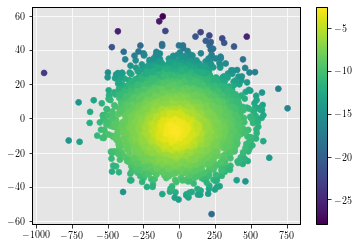

In [33]:
plt.figure(figsize=(6, 4))
plt.scatter(pos[:, 0], pos[:, 1], c=np.log(pot), cmap='viridis')
plt.colorbar()

In [34]:
# number of walkers
N = 16

z = np.random.randn(N)*200
w = np.random.randn(N)*20
dz = 1
pos = np.array([z, w]).T
pos.shape

(16, 2)

In [19]:
nwalkers = pos.shape[0]
ndim = pos.shape[1]

t0 = time()
chain = Model.DM.sample(1000, nwalkers, pos, theta, dz=1., verbose=True, parallel=True)
print(time() - t0, "s")

2.1882429122924805 s


100%|██████████| 2/2 [00:00<00:00, 147.66it/s]


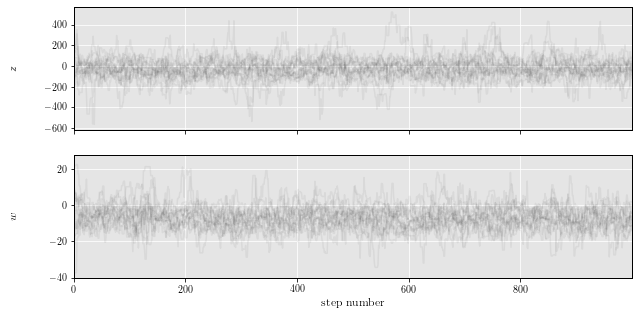

In [20]:
plot_chain(
    chain,
    labels=[r'$z$', r'$w$'],
    figsize=(10, 5),
    alpha=0.05,
) 

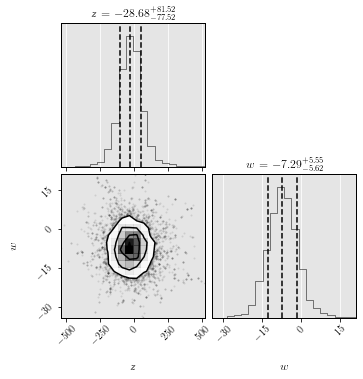

In [21]:
plot_corner(
    params=chain,
    labels=[r'$z$', r'$w$'],
    burn=100,
) 

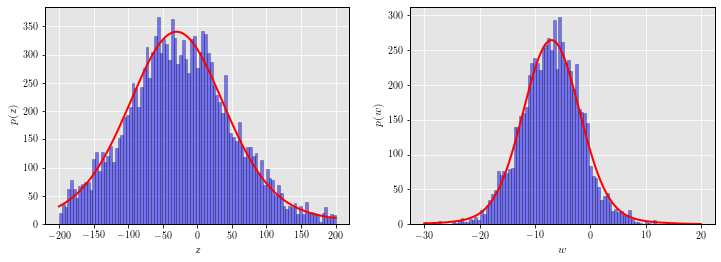

In [22]:
z_sample = chain[:, :, 0].flatten()
w_sample = chain[:, :, 1].flatten()
mask = (z_sample > -50) & (z_sample < 50)
w_sample = w_sample[mask]

z_edge = np.linspace(-200, 200, 100)
dz = z_edge[1] - z_edge[0]
z_mid = (z_edge[:-1] + z_edge[1:])/2
z_num, _ = np.histogram(z_sample, bins=z_edge)
ztot = simps(z_num, z_mid)
zs = np.linspace(z_edge.min(), z_edge.max(), 1000)
fz = Model.DM.fz(zs, theta, dz)
fz = fz * ztot / simps(fz, zs)

w_edge = np.linspace(-30, 20, 100)
dw = w_edge[1] - w_edge[0]
w_mid = (w_edge[:-1] + w_edge[1:])/2
w_num, _ = np.histogram(w_sample, bins=w_edge)
wtot = simps(w_num, w_mid)
ws = np.linspace(w_edge.min(), w_edge.max(), 1000)
fw = Model.DM.fw(ws, theta)
fw = fw * wtot / simps(fw, ws)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(z_mid, z_num, width=dz, color='b', alpha=0.5, ec="k")
axes[0].plot(zs, fz, color='r', lw=2)
axes[0].set_xlabel(r'$z$')
axes[0].set_ylabel(r'$p(z)$')
axes[1].bar(w_mid, w_num, width=dw, color='b', alpha=0.5, ec="k")
axes[1].plot(ws, fw, color='r', lw=2)
axes[1].set_xlabel(r'$w$')
axes[1].set_ylabel(r'$p(w)$')
plt.show()

# run 1 million times

run it in a script

In [9]:
chain = np.load(join(root_data_dir, "MCMC-mock", "chain.npy"))
chain.shape

(1000000, 16, 2)

# different $z$, $N=5000$

figure out the size of the generated data, using gaussian distribution

In [10]:
def frho(phi, rho0, sigmaz):
    return rho0*np.exp(-phi/sigmaz**2)

def rhob_tot(phi, rhos, sigmaz):
    rho = np.array(list(map(lambda par: frho(phi, par[0], par[1]), zip(rhos, sigmaz))))
    return rho.sum(axis=0)

In [11]:
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
rhob = np.array(df_baryon["rho"].to_numpy())  # Msun/pc^3
rhoDM = 0.02
log_nu0 = 0
zsun = 30
R = 3.4E-3
w0 = -7
sigmaw1 = 5
sigmaw2 = 10
log_sigmaw = np.log(sigmaw1)
q_sigmaw = sigmaw1/sigmaw2
a1 = 1
a2 = 0.1
log_a = np.log(a1)
q_a = a2/a1
log_phi = 3
theta = concat(sigmaz, rhob, rhoDM, log_nu0, zsun, R, w0, log_sigmaw, q_sigmaw, log_a, q_a, log_phi)
phi = Model.DM.potential(np.array([50.+zsun]), theta, dz=0.5)
log_phi = np.log(phi)
theta[-1] = log_phi

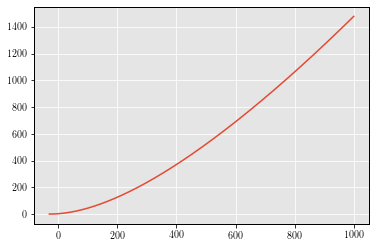

In [12]:
z = np.linspace(-zsun, 1000, 1000)
phi = Model.DM.potential(z, theta, dz=0.1)

plt.figure(figsize=(6, 4))
plt.plot(z, phi)

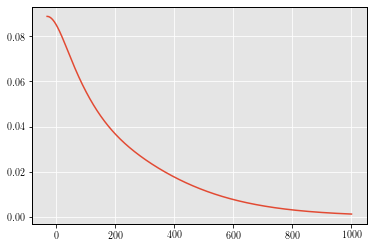

In [13]:
rhob_z = rhob_tot(phi, rhob, sigmaz)
plt.plot(z, rhob_z)

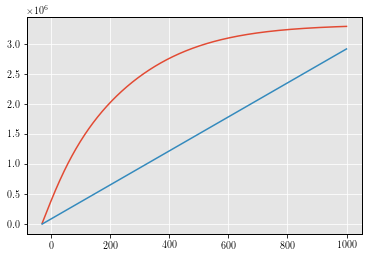

In [14]:
dz = z[1] - z[0]
A = np.pi*150**2
mass_b = np.cumsum(rhob_z)*A*dz*2
mass_dm = rhoDM*A*(z+zsun)*2

plt.figure(figsize=(6, 4))
plt.plot(z, mass_b, label="baryon")
plt.plot(z, mass_dm, label="DM")
plt.show()


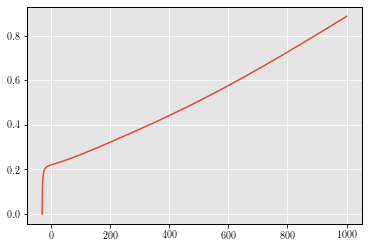

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(z, mass_dm/mass_b)
plt.show()

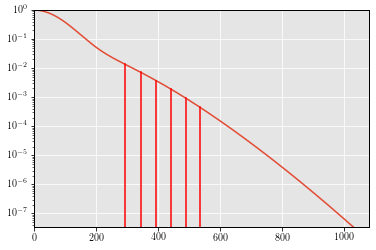

[293.20185745 344.01125851 393.56595091 441.67216945 488.27966343
 533.45255413]


In [16]:
from scipy.interpolate import interp1d

dz = 0.01
z = np.arange(-zsun, 1000, dz)
phi = Model.DM.potential(z, theta, dz)
z_interp = interp1d(phi, z, kind="cubic")
rhobz = rhob_tot(phi, rhob, sigmaz)

ratio = [0.36, 0.39, 0.42, 0.45, 0.48, 0.51] # rhoDM/rhob
num = len(ratio)
zb = np.empty(num)
rhob_z = rhob_tot(phi, rhob, sigmaz)
A = np.pi*150**2
mass_b = np.cumsum(rhob_z)*A*dz*2
mass_dm = rhoDM*A*(z+zsun)*2
ratio_interp = interp1d(mass_dm/mass_b, z, kind="linear")
zb = ratio_interp(ratio)
fz = Model.DM.fz(z, theta, dz)
fz_b = Model.DM.fz(zb, theta, dz)
plt.plot(z+zsun, fz)
for i in range(num):
    plt.plot([zb[i]+zsun, zb[i]+zsun], [0, fz_b[i]], 'r')
plt.xlim(0)
plt.ylim(fz.min())
plt.yscale("log")
plt.show()
zb = zb + zsun
print(zb)

generate...

(0.0, 1.0)

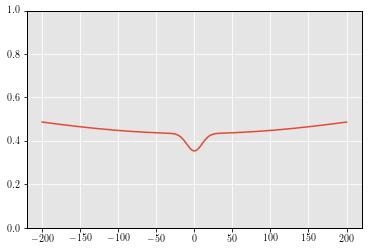

In [18]:
from scipy.stats import norm
def compz(z):
    a = -2*norm.pdf(z, loc=0, scale=10) -200*norm.pdf(z, loc=0, scale=300)
    return a+0.7

zz = np.linspace(-200, 200, 1000)

plt.plot(zz, compz(zz))
plt.ylim(0,1)


50000


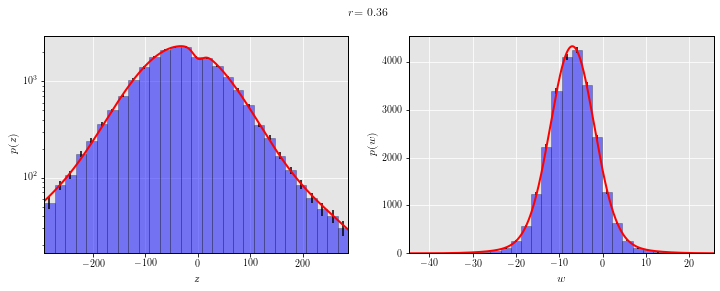

[-283.20185745 -263.20185745 -243.20185745 -223.20185745 -203.20185745
 -183.20185745 -163.20185745 -143.20185745 -123.20185745 -103.20185745
  -83.20185745  -63.20185745  -43.20185745  -23.20185745   -3.20185745
   16.79814255   36.79814255   56.79814255   76.79814255   96.79814255
  116.79814255  136.79814255  156.79814255  176.79814255  196.79814255
  216.79814255  236.79814255  256.79814255  276.79814255]
saved z_0.36.hdf5 and w_0.36.hdf5
50000


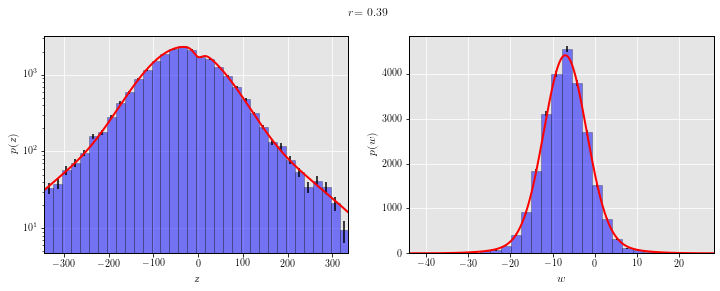

[-334.01125851 -314.01125851 -294.01125851 -274.01125851 -254.01125851
 -234.01125851 -214.01125851 -194.01125851 -174.01125851 -154.01125851
 -134.01125851 -114.01125851  -94.01125851  -74.01125851  -54.01125851
  -34.01125851  -14.01125851    5.98874149   25.98874149   45.98874149
   65.98874149   85.98874149  105.98874149  125.98874149  145.98874149
  165.98874149  185.98874149  205.98874149  225.98874149  245.98874149
  265.98874149  285.98874149  305.98874149  325.98874149]
saved z_0.39.hdf5 and w_0.39.hdf5
50000


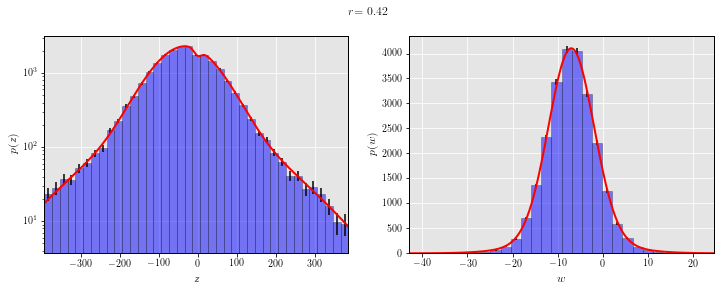

[-383.56595091 -363.56595091 -343.56595091 -323.56595091 -303.56595091
 -283.56595091 -263.56595091 -243.56595091 -223.56595091 -203.56595091
 -183.56595091 -163.56595091 -143.56595091 -123.56595091 -103.56595091
  -83.56595091  -63.56595091  -43.56595091  -23.56595091   -3.56595091
   16.43404909   36.43404909   56.43404909   76.43404909   96.43404909
  116.43404909  136.43404909  156.43404909  176.43404909  196.43404909
  216.43404909  236.43404909  256.43404909  276.43404909  296.43404909
  316.43404909  336.43404909  356.43404909  376.43404909]
saved z_0.42.hdf5 and w_0.42.hdf5
50000


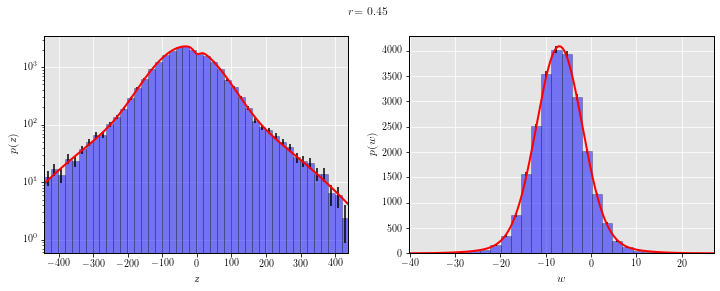

[-431.67216945 -411.67216945 -391.67216945 -371.67216945 -351.67216945
 -331.67216945 -311.67216945 -291.67216945 -271.67216945 -251.67216945
 -231.67216945 -211.67216945 -191.67216945 -171.67216945 -151.67216945
 -131.67216945 -111.67216945  -91.67216945  -71.67216945  -51.67216945
  -31.67216945  -11.67216945    8.32783055   28.32783055   48.32783055
   68.32783055   88.32783055  108.32783055  128.32783055  148.32783055
  168.32783055  188.32783055  208.32783055  228.32783055  248.32783055
  268.32783055  288.32783055  308.32783055  328.32783055  348.32783055
  368.32783055  388.32783055  408.32783055  428.32783055]
saved z_0.45.hdf5 and w_0.45.hdf5
50000


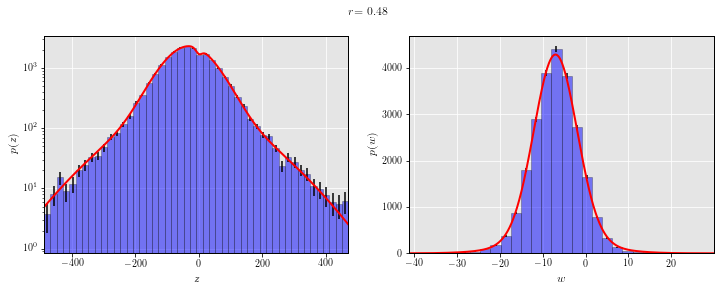

[-478.27966343 -458.27966343 -438.27966343 -418.27966343 -398.27966343
 -378.27966343 -358.27966343 -338.27966343 -318.27966343 -298.27966343
 -278.27966343 -258.27966343 -238.27966343 -218.27966343 -198.27966343
 -178.27966343 -158.27966343 -138.27966343 -118.27966343  -98.27966343
  -78.27966343  -58.27966343  -38.27966343  -18.27966343    1.72033657
   21.72033657   41.72033657   61.72033657   81.72033657  101.72033657
  121.72033657  141.72033657  161.72033657  181.72033657  201.72033657
  221.72033657  241.72033657  261.72033657  281.72033657  301.72033657
  321.72033657  341.72033657  361.72033657  381.72033657  401.72033657
  421.72033657  441.72033657  461.72033657]
saved z_0.48.hdf5 and w_0.48.hdf5
50000


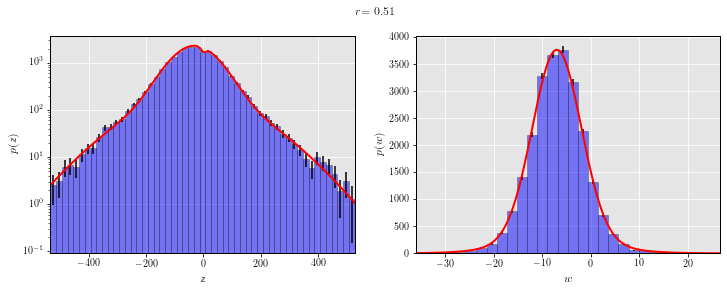

[-523.45255413 -503.45255413 -483.45255413 -463.45255413 -443.45255413
 -423.45255413 -403.45255413 -383.45255413 -363.45255413 -343.45255413
 -323.45255413 -303.45255413 -283.45255413 -263.45255413 -243.45255413
 -223.45255413 -203.45255413 -183.45255413 -163.45255413 -143.45255413
 -123.45255413 -103.45255413  -83.45255413  -63.45255413  -43.45255413
  -23.45255413   -3.45255413   16.54744587   36.54744587   56.54744587
   76.54744587   96.54744587  116.54744587  136.54744587  156.54744587
  176.54744587  196.54744587  216.54744587  236.54744587  256.54744587
  276.54744587  296.54744587  316.54744587  336.54744587  356.54744587
  376.54744587  396.54744587  416.54744587  436.54744587  456.54744587
  476.54744587  496.54744587  516.54744587]
saved z_0.51.hdf5 and w_0.51.hdf5


#,mid,num,com
0,-523.4525541321109,2.5678440223819976,0.6419610055954994
1,-503.4525541321109,3.174730658567774,0.6349461317135547
2,-483.4525541321109,6.2740676086103395,0.627406760861034
3,-463.4525541321109,6.812881345284372,0.6193528495713065
4,-443.4525541321109,6.108027057474466,0.6108027057474466
...,...,...,...
48,436.5474458678891,6.685141690172625,0.6077401536520568
49,456.5474458678891,4.31519035798654,0.6164557654266486
50,476.5474458678891,1.8740505446352325,0.6246835148784108
51,496.5474458678891,3.162010342953938,0.6324020685907876


In [20]:
import vaex

Nz = 50_000
burn = 1000
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
for i, zbi in enumerate(zb):
    mask = np.abs(z) < zbi
    z_sample = z[mask]
    w_sample = w[mask]
    index = np.random.randint(0, len(z_sample), Nz)
    z_sample = z_sample[index]
    w_sample = w_sample[index]
    zedge = np.arange(-zbi, zbi, 20.)
    znum, zedge = np.histogram(z_sample, bins=zedge)
    znum = znum.astype(float)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    comp = compz(zmid)
    znum = znum*comp
    zerr = np.sqrt(znum)
    z_tot = znum.sum()*dz
    zdata = (zmid, znum)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    comp_s = compz(zs)
    fz = Model.DM.fz(zs, theta, zs[1]-zs[0])*comp_s
    area = simps(fz, zs)
    fz = fz/(area)*z_tot

    zbound = 50
    mask = np.abs(z_sample+zsun) < zbound
    w_sample = w_sample[mask]
    wnum, wedge = np.histogram(w_sample, bins=30)
    wnum = wnum.astype(float)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = Model.DM.fw(ws, theta)
    area = simps(fw, ws)
    fw = fw/area*w_tot
    wdata = (wmid, wnum)

    # plot the data
    print(len(z_sample))
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[0].set_xlim(zedge.min(), zedge.max())
    axes[0].set_yscale('log')
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    axes[1].set_xlim(wedge.min(), wedge.max())
    fig.suptitle(r'$r$= {}'.format(ratio[i]))
    plt.show()
    df_z = vaex.from_arrays(mid=zmid, num=znum, com=comp)
    df_w = vaex.from_arrays(mid=wmid, num=wnum)
    print(zmid)
    # df_z.export(join(root_dir, 'Data', 'MCMC-mock', 'z', f'z_{ratio[i]}.hdf5'), progress=True)
    # df_w.export(join(root_dir, 'Data', 'MCMC-mock', 'z' , f'w_{ratio[i]}.hdf5'), progress=True)
    print(f"saved z_{ratio[i]}.hdf5 and w_{ratio[i]}.hdf5")
    # break
df_z

# different $N$, $z=z_b$

In [83]:
zb, ratio

(array([293.20185745, 344.01125851, 393.56595091, 441.67216945,
        488.27966343, 533.45255413]),
 [0.36, 0.39, 0.42, 0.45, 0.48, 0.51])

In [18]:
theta

array([ 3.70000000e+00,  7.10000000e+00,  2.21000000e+01,  3.90000000e+01,
        1.55000000e+01,  7.50000000e+00,  1.20000000e+01,  1.80000000e+01,
        1.85000000e+01,  1.85000000e+01,  2.00000000e+01,  2.00000000e+01,
        1.04000000e-02,  2.77000000e-02,  7.30000000e-03,  5.00000000e-04,
        6.00000000e-04,  1.80000000e-03,  1.80000000e-03,  2.90000000e-03,
        7.20000000e-03,  2.16000000e-02,  5.60000000e-03,  1.50000000e-03,
        2.00000000e-02,  0.00000000e+00,  3.00000000e+01,  3.40000000e-03,
       -7.00000000e+00,  1.60943791e+00,  5.00000000e-01,  0.00000000e+00,
        1.00000000e-01,  3.47749839e+00])

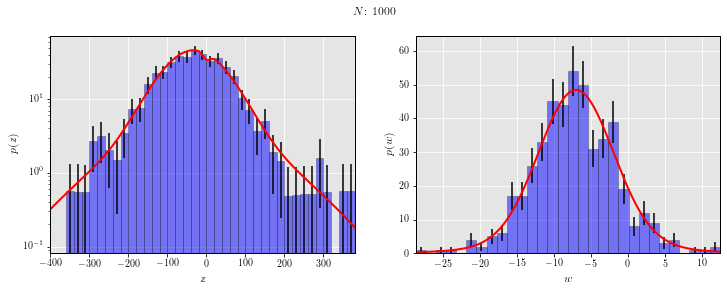

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0001000.hdf5 and w_0001000.hdf5
1000 469


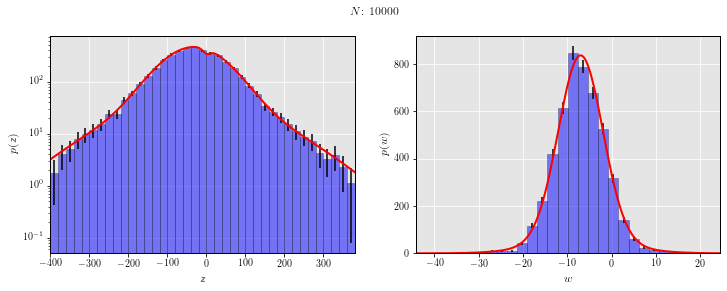

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0010000.hdf5 and w_0010000.hdf5
10000 4873


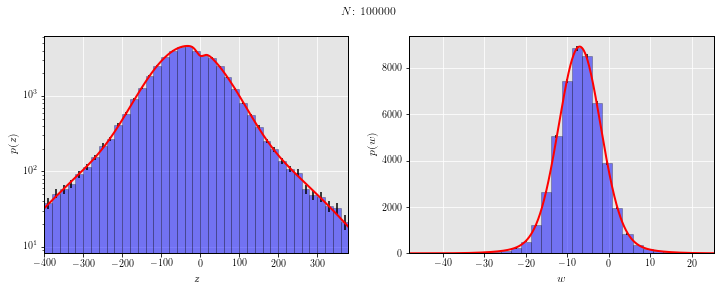

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_0100000.hdf5 and w_0100000.hdf5
100000 48575


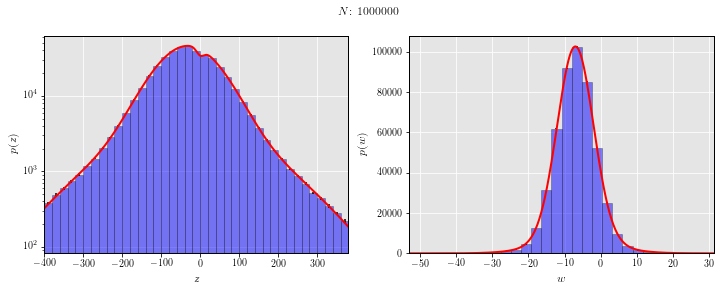

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved z_1000000.hdf5 and w_1000000.hdf5
1000000 487054


In [70]:
import vaex

zb = 400

burn = 1000
z = chain[burn:, :, 0].flatten()
w = chain[burn:, :, 1].flatten()
mask = np.abs(z) < zb
z_s = z[mask]
w_s = w[mask]
for Nz in [1000, 10_000, 100_000, 1_000_000]:
    index = np.random.randint(0, len(z_s), Nz)
    z_sample = z_s[index]
    w_sample = w_s[index]
    zedge = np.arange(-zb, zb, 20.)
    znum, zedge = np.histogram(z_sample, bins=zedge)
    znum = znum.astype(float)
    dz = zedge[1]-zedge[0]
    zmid = (zedge[:-1]+zedge[1:])/2
    mask = znum > 0
    znum = znum[mask]
    zmid = zmid[mask]
    comp = compz(zmid)
    znum = znum*comp
    zerr = np.sqrt(znum)
    z_tot = znum.sum()*dz
    zdata = (zmid, znum)
    zs = np.linspace(zedge.min()*1.1, zedge.max()*1.1, 1000)
    comp_s = compz(zs)
    fz = Model.DM.fz(zs, theta, zs[1]-zs[0])*comp_s
    area = simps(fz, zs)
    fz = fz/(area)*z_tot

    zbound = 50
    mask = np.abs(z_sample+zsun) < zbound
    w_sample = w_sample[mask]
    wnum, wedge = np.histogram(w_sample, bins=30)
    wnum = wnum.astype(float)
    dw = wedge[1]-wedge[0]
    wmid = (wedge[:-1]+wedge[1:])/2
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    w_tot = wnum.sum()*dw
    ws = np.linspace(wedge.min(), wedge.max(), 1000)
    fw = Model.DM.fw(ws, theta)
    area = simps(fw, ws)
    fw = fw/area*w_tot

    # plot the data
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].bar(zmid, znum, yerr=zerr, width=zedge[1]-zedge[0], color='b', alpha=0.5, ec="k")
    axes[0].plot(zs, fz, color='r', lw=2)
    axes[0].set_xlabel(r'$z$')
    axes[0].set_ylabel(r'$p(z)$')
    axes[0].set_xlim(zedge.min(), zedge.max())
    axes[0].set_yscale('log')
    axes[1].bar(wmid, wnum, yerr=werr, width=wedge[1]-wedge[0], color='b', alpha=0.5, ec="k")
    axes[1].plot(ws, fw, color='r', lw=2)
    axes[1].set_xlabel(r'$w$')
    axes[1].set_ylabel(r'$p(w)$')
    axes[1].set_xlim(wedge.min(), wedge.max())
    fig.suptitle(r'$N$: {}'.format(Nz))
    plt.show()
    df_z = vaex.from_arrays(mid=zmid, num=znum, com=comp)
    df_w = vaex.from_arrays(mid=wmid, num=wnum)
    df_z.export(join(root_dir, 'Data', 'MCMC-mock', 'sample', 'n', f'z_{Nz:07d}.hdf5'), progress=True)
    df_w.export(join(root_dir, 'Data', 'MCMC-mock', 'sample', 'n' , f'w_{Nz:07d}.hdf5'), progress=True)
    print(f"saved z_{Nz:07d}.hdf5 and w_{Nz:07d}.hdf5")
    print(Nz, len(w_sample))
    # break
    